In [90]:
import numpy as np
import pandas as pd 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dataset = pd.read_csv("../Downloads/Brain Tumor.csv")
##"C:\Users\Patron\Downloads\Brain Tumor.csv"
dataset


,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3757,Image3758,0,21.234512,1208.850174,34.768523,0.063774,2.082079,4.647310,158.437600,0.220666,0.048693,0.487131,5.211739,0.950972,7.458341e-155
3758,Image3759,0,20.435349,1227.151440,35.030721,0.066763,2.144625,4.882034,161.158675,0.225931,0.051045,0.502712,5.083126,0.952749,7.458341e-155
3759,Image3760,0,18.011520,1151.582765,33.934978,0.068396,2.308349,5.579498,167.130118,0.228930,0.052409,0.492269,5.103700,0.952181,7.458341e-155
3760,Image3761,0,13.330429,945.732779,30.752769,0.087872,2.732822,7.757570,223.812932,0.261527,0.068397,0.480064,6.439784,0.940898,7.458341e-155


In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [92]:
dataset.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [93]:
numberOfClasses = dataset[["Class"]]
numberOfClasses.value_counts()

Class
0        2079
1        1683
dtype: int64

In [94]:
#X, y = dataset.data, dataset.target
tumors = dataset
y = tumors["Class"]
X = tumors.drop("Class", axis = 1)
X = tumors.drop("Image", axis = 1)

In [104]:
X
y

0       0
1       0
2       1
3       1
4       0
       ..
3757    0
3758    0
3759    0
3760    0
3761    0
Name: Class, Length: 3762, dtype: int64

***Defining the temp, test, and train values for X and y***

In [105]:

X_temp, X_test, y_temp, y_test = \
    train_test_split(X,y, test_size = 0.3, random_state = 123, stratify = y)
X_train, X_valid, y_train, y_valid = \
    train_test_split(X_temp, y_temp, test_size = 0.2, random_state=123, stratify = y_temp)
# Right now i'm getting the number for the bootstrap sample




***X temp***

In [106]:
print("X_temp:\n\n", X_temp) 

print("-----------------------------------------------------------------")
print("                                                                 ")
    


X_temp:

       Class       Mean     Variance  Standard Deviation   Entropy  Skewness  \
1313      0   2.764893    91.508175            9.565991  0.144354  3.997518   
947       0   6.676651   323.721248           17.992255  0.088594  3.039905   
3653      1   2.187149   369.269780           19.216394  0.002001  9.120151   
3628      1  22.776367  1824.696640           42.716468  0.069940  2.329034   
2216      1  12.523651  1370.158444           37.015651  0.004962  3.430271   
...     ...        ...          ...                 ...       ...       ...   
993       0   6.102524   466.884225           21.607504  0.090480  3.963471   
224       0   6.483643   552.897023           23.513762  0.141789  3.925870   
2924      1  12.291122  1937.071961           44.012180  0.003154  4.075355   
930       0   6.438248   438.313207           20.935931  0.240669  3.675267   
1850      0   5.163040   300.015626           17.320959  0.187365  3.872788   

       Kurtosis    Contrast    Energy    

***X test***

In [107]:
print("X_test: \n\n", X_test) 

print("-----------------------------------------------------------------")
print("                                                                 ")



X_test: 

       Class       Mean     Variance  Standard Deviation   Entropy  Skewness  \
1907      0  15.512802   662.801791           25.744937  0.107033  2.114568   
3126      1   6.826950   379.496518           19.480670  0.082005  3.500037   
3053      1   3.263428   363.192349           19.057606  0.003396  6.454262   
2         1   7.341095  1143.808219           33.820234  0.001467  5.061750   
665       0   2.669662   121.076637           11.003483  0.120600  4.541854   
...     ...        ...          ...                 ...       ...       ...   
1503      0  12.996506  1017.878584           31.904210  0.082926  2.992553   
914       0   6.740723   416.849263           20.416887  0.218551  3.536230   
1819      0   6.491806   376.796252           19.411240  0.215432  3.459460   
1638      0   1.982727    41.391163            6.433596  0.236842  3.704435   
3611      1  17.867081  1841.820690           42.916438  0.004194  2.978043   

       Kurtosis    Contrast    Energy   

***y temp***

In [108]:
print("y_temp: \n\n", y_temp) 

print("-----------------------------------------------------------------")
print("                                                                 ")



y_temp: 

 1313    0
947     0
3653    1
3628    1
2216    1
       ..
993     0
224     0
2924    1
930     0
1850    0
Name: Class, Length: 2633, dtype: int64
-----------------------------------------------------------------
                                                                 


***y test***

In [109]:
print("y_test: \n\n", y_test) 

print("-----------------------------------------------------------------")
print("                                                                 ")



y_test: 

 1907    0
3126    1
3053    1
2       1
665     0
       ..
1503    0
914     0
1819    0
1638    0
3611    1
Name: Class, Length: 1129, dtype: int64
-----------------------------------------------------------------
                                                                 


***X train***

In [110]:
print("X_train: \n\n", X_train) 

print("-----------------------------------------------------------------")
print("                                                                 ")



X_train: 

       Class       Mean     Variance  Standard Deviation   Entropy  Skewness  \
3442      1  10.404755  1453.199860           38.120859  0.012300  4.211365   
3746      1  10.831894  1328.954984           36.454835  0.001165  3.970012   
3673      1   6.000412   719.323961           26.820216  0.006180  4.808076   
2481      1   6.018890   451.690712           21.253017  0.002448  4.253671   
230       0  14.108932   818.831972           28.615240  0.065343  2.472757   
...     ...        ...          ...                 ...       ...       ...   
3544      1   9.202316  1180.816780           34.363015  0.016779  4.231330   
3109      0   3.074554   163.386077           12.782256  0.176634  4.804644   
1182      1   7.373169  1167.120007           34.163138  0.001876  4.955792   
844       0   5.145676   333.047438           18.249587  0.260824  3.845897   
1354      1   9.334335   801.037701           28.302609  0.054264  3.587016   

       Kurtosis    Contrast    Energy  

***X valid***

In [111]:
print("X_valid: \n\n", X_valid) 

print("-----------------------------------------------------------------")
print("                                                                 ")


X_valid: 

       Class       Mean     Variance  Standard Deviation   Entropy  Skewness  \
3087      0  11.996506   878.400872           29.637828  0.083381  2.838864   
1784      1   4.099594   423.355575           20.575606  0.016982  6.257531   
487       0   3.562088   157.468982           12.548665  0.096094  3.950756   
718       0  18.199188  1298.868370           36.039816  0.071689  2.386968   
25        1   7.483704   761.819740           27.601082  0.001380  4.368951   
...     ...        ...          ...                 ...       ...       ...   
2984      1  12.302475   887.542666           29.791654  0.005564  2.986563   
1191      1  23.254120  2114.125950           45.979625  0.015812  2.593075   
1383      1   3.869141   483.842369           21.996417  0.001495  6.132041   
2346      1   7.171478  1113.365705           33.367135  0.001232  5.152125   
2330      0  16.204147   847.326459           29.108873  0.125876  2.269702   

       Kurtosis    Contrast    Energy  

***y train***

In [112]:
print("y_train: \n\n", y_train) 

print("-----------------------------------------------------------------")
print("                                                                 ")



y_train: 

 3442    1
3746    1
3673    1
2481    1
230     0
       ..
3544    1
3109    0
1182    1
844     0
1354    1
Name: Class, Length: 2106, dtype: int64
-----------------------------------------------------------------
                                                                 


***y valid***

In [114]:
print("y_valid: \n\n", y_valid) 

print("-----------------------------------------------------------------")
print("                                                                 ")

y_valid: 

 3087    0
1784    1
487     0
718     0
25      1
       ..
2984    1
1191    1
1383    1
2346    1
2330    0
Name: Class, Length: 527, dtype: int64
-----------------------------------------------------------------
                                                                 


### ***Bagging Approach***

In [97]:

tree = DecisionTreeClassifier(criterion = 'entropy',
                            random_state = 1,
                            max_depth = None)

bag = BaggingClassifier(base_estimator = tree,
                       n_estimators = 500,
                       oob_score = True,
                       bootstrap = True,
                       bootstrap_features = False,
                       n_jobs = 1,
                       random_state = 1)

bag.fit(X_train, y_train)
oobAccuracy =  bag.oob_score_ 
trainAccuracy =  bag.score(X_train, y_train)
validationAccuracy = bag.score(X_valid, y_valid)
testAccuracy =  bag.score(X_test, y_test)

print("00B Accuracy: %0.2f"   % (oobAccuracy * 100), "%")
print("Train Accuracy: %0.3f"  % (trainAccuracy * 100), "%")
print("Validation AccuracyL %f" % ( validationAccuracy * 100), "%")
print("Test Accuracy: %0.2f"  % (testAccuracy * 100), "%")



00B Accuracy: 100.00 %
Train Accuracy: 100.000 %
Validation AccuracyL 100.000000 %
Test Accuracy: 100.00 %


### ***Dummy Classifier from Sklearn Approach***

In [98]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)

DCA = dummy_clf.score(X, y) * 100
print("Dummy Classifier Accuracy: ", DCA, "%")


Dummy Classifier Accuracy:  55.26315789473685 %


### ***Stacking(CV) Approach***

In [102]:
from mlxtend.classifier import StackingCVClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection

clf1 = KNeighborsClassifier(n_neighbors = 5)
clf2 = RandomForestClassifier(random_state = 123)
clf3 = GradientBoostingClassifier(random_state = 123)
clf4 = AdaBoostClassifier(random_state = 123)
clf5 = DecisionTreeClassifier(random_state = 123,
                             max_depth = None)

lr = LogisticRegression(random_state = 123)


sclf = StackingCVClassifier(
                        classifiers = [clf1, clf2, clf3, clf4, clf5],
                           meta_classifier = lr,
                           use_probas = True,
                           drop_proba_col = 'last',
                           cv = 10,
                           random_state = 123)
sclf.fit(X_train, y_train)


sTrainAccuracy =  sclf.score(X_train, y_train)
sTalidationAccuracy = sclf.score(X_valid, y_valid)
sTestAccuracy =  sclf.score(X_test, y_test)


print("Train Accuracy: %0.3f"  % (sTrainAccuracy * 100), "%")
print("Validation AccuracyL %f" % ( sTalidationAccuracy * 100), "%")
print("Test Accuracy: %0.2f"  % (sTestAccuracy * 100), "%")


Train Accuracy: 100.000 %
Validation AccuracyL 100.000000 %
Test Accuracy: 100.00 %


### ***Majority Voting Approach***

In [100]:



from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from mlxtend.classifier import EnsembleVoteClassifier

print("Train/Valid/Test size: ", y_train.shape[0], y_valid.shape[0], y_test.shape[0])
print("------------------------------------------------------------------")
print("                                                                  ")

clf1 = DecisionTreeClassifier(random_state = 1, max_depth =None)
clf2 = DecisionTreeClassifier(random_state = 1, max_depth =1)
clf3 = DecisionTreeClassifier(random_state = 1, max_depth =2)
eclf = EnsembleVoteClassifier(clfs = [clf1, clf2, clf3], weights=[1,1,1])

labels = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Ensemble']

for clf, label in zip([clf1, clf2, clf3, eclf], labels):
    clf.fit(X_train, y_train)
    clfScore = clf.score(X_valid, y_valid)
    clfTrain = clf.score(X_train, y_train)
    print("Train Accuracy:         %0.3f" % (clfTrain * 100), "%            ", label)
    print("Validation Accuracy:    %0.3f " % (clfScore * 100), "%           ", label)
    print("-----------------------------------------------------------------")
    print("                                                                 ")

    #clfScore = clf.score(X_valid, y_valid)
    #clfTrain = clf.score(X_train, y_train)
#    print("Train Accuracy: %0.2f " % (clf.score(X_valid, y_valid)), "%")
  #  print("Validation Accuracy: %0.2f" % (clf.score(X_train, y_train)), "%")

testScore = eclf.score(X_test, y_test)
print("Test Accuracy:          %0.3f" % (testScore * 100), "%")


Train/Valid/Test size:  2106 527 1129
------------------------------------------------------------------
                                                                  
Train Accuracy:         100.000 %             Classifier 1
Validation Accuracy:    100.000  %            Classifier 1
-----------------------------------------------------------------
                                                                 
Train Accuracy:         100.000 %             Classifier 2
Validation Accuracy:    100.000  %            Classifier 2
-----------------------------------------------------------------
                                                                 
Train Accuracy:         100.000 %             Classifier 3
Validation Accuracy:    100.000  %            Classifier 3
-----------------------------------------------------------------
                                                                 
Train Accuracy:         100.000 %             Ensemble
Validation Accuracy:   

<AxesSubplot:>

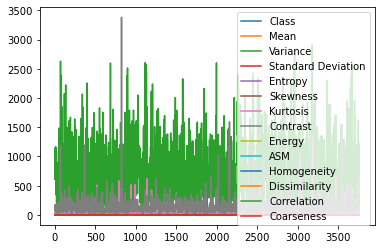

In [115]:
dataset.plot()

In [116]:
dataset.keys()

Index(['Image', 'Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

In [117]:
dataset.items()

<generator object DataFrame.items at 0x000001F4A08F70B0>

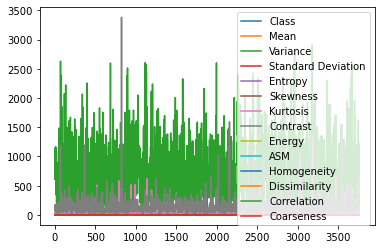

In [123]:
import matplotlib.pyplot as plt
dataset.plot()
plt.show()

In [130]:
from tensorflow import keras
history = tree.fit(X_train, y_train, epochs=34, batch_size=1, validation_data=(X_valid, y_valid))

loss_train = history.history['acc']
loss_val = history.history['val_acc']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

AttributeError: 'EnsembleVoteClassifier' object has no attribute 'history'